## 1 

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

#### 1.1. Скачать данные (недвижимость)


In [68]:
import pandas as pd
import numpy as np

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('kc_house_data.csv', sep=',')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2 Изучите стоимости недвижимости


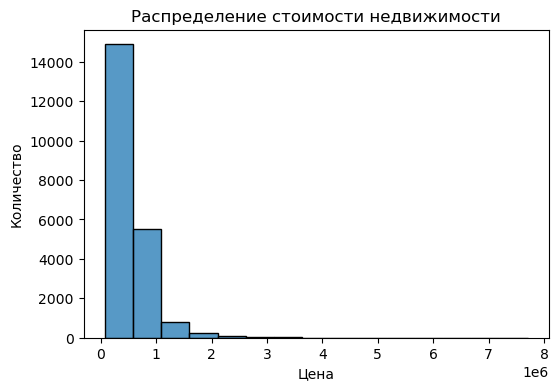

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], bins=15)

plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

#### 1.3 Изучите распределение квадратуры жилой площади


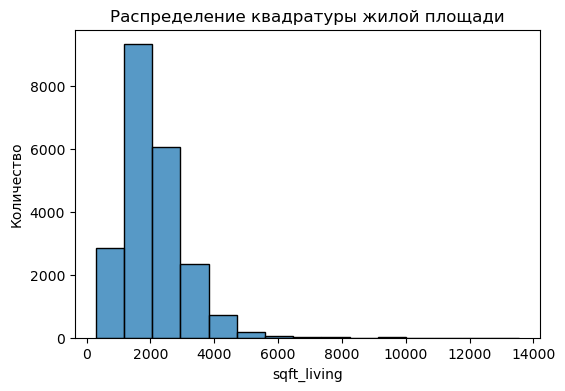

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(df['sqft_living'], bins=15)

plt.title('Распределение квадратуры жилой площади')
plt.xlabel('sqft_living')
plt.ylabel('Количество');

#### 1.4 Изучите распределение года постройки


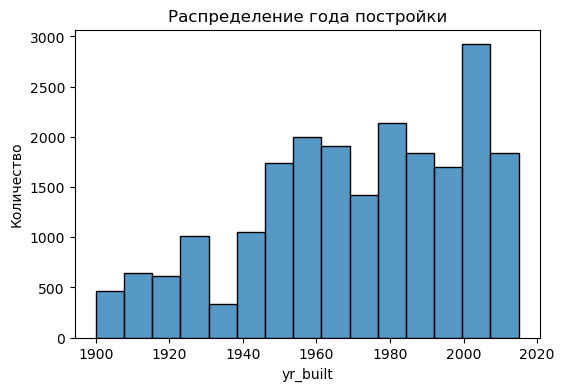

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(df['yr_built'], bins=15)

plt.title('Распределение года постройки')
plt.xlabel('yr_built')
plt.ylabel('Количество');

## 2
#### 2.1 Изучите распределение домов от наличия вида на набережную


In [25]:
df_wf = df['waterfront'].value_counts()
df_wf

0    21450
1      163
Name: waterfront, dtype: int64

Text(0.5, 1.0, 'Распределение домов от наличия вида на набережную')

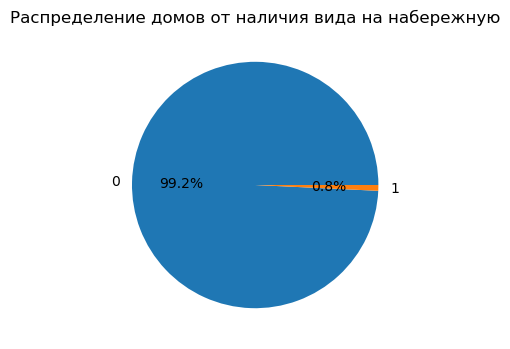

In [23]:

names = df_wf.index
values = df_wf.values

plt.figure(figsize=(6, 4))

plt.pie(values, labels=names, autopct='%1.1f%%')

plt.title('Распределение домов от наличия вида на набережную');

#### 2.2 Изучите распределение этажей домов


In [26]:
df_f = df['floors'].value_counts()
df_f

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

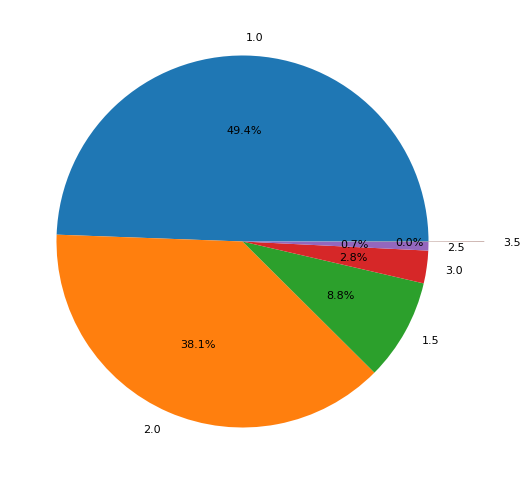

In [62]:
names = df_f.index
values = df_f.values
explode = [0, 0, 0, 0, 0, 0.3]
fig, ax = plt.subplots(figsize=(6, 8))
ax.pie(values, labels=names, autopct='%.1f%%', explode=explode)

for text in ax.texts:
    text.set_fontsize(8);

#### 2.3 Изучите распределение состояния домов


In [63]:
df_c = df['condition'].value_counts()
df_c

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

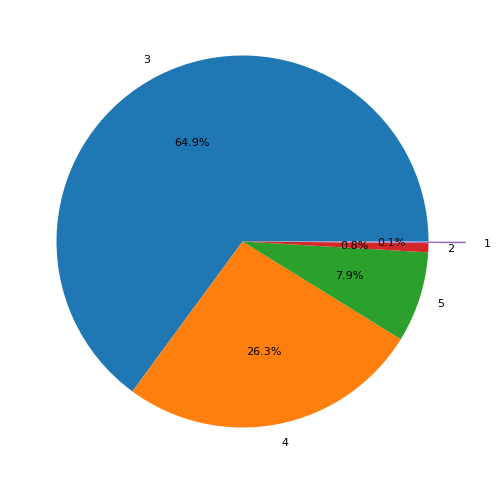

In [66]:
names = df_c.index
values = df_c.values
explode = [0, 0, 0, 0, 0.2]
fig, ax = plt.subplots(figsize=(6, 8))
ax.pie(values, labels=names, autopct='%.1f%%', explode=explode)

for text in ax.texts:
    text.set_fontsize(8);

## 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


In [70]:

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


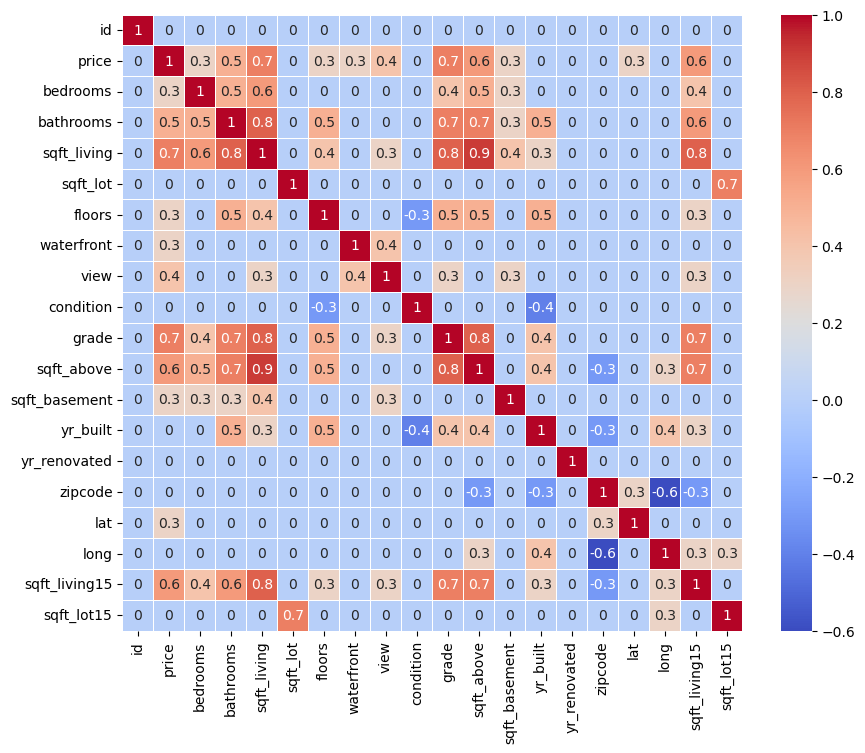

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5);

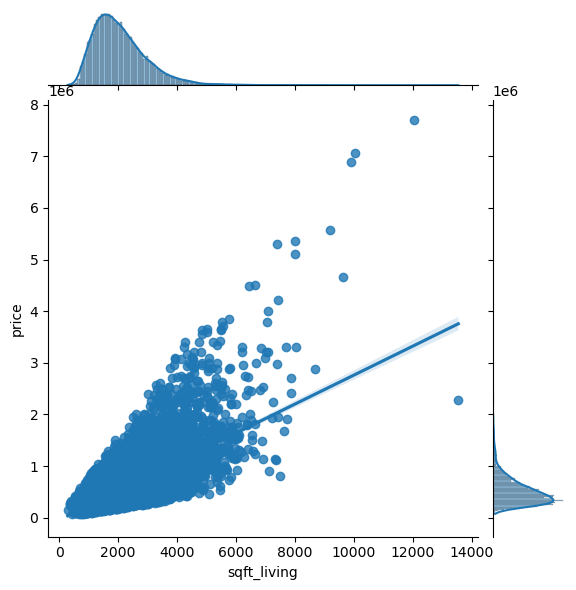

In [75]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

Стоимость продажи дома зависит от кв.метров жилых помещений

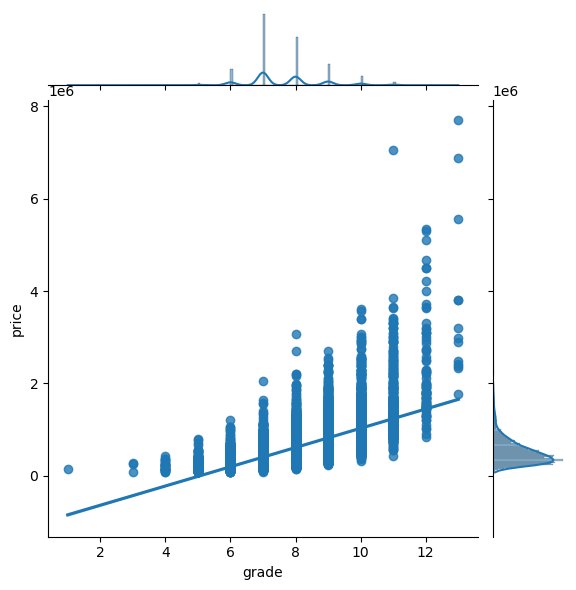

In [86]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

Чем выше уровень качества конструкции здания, тем выше цена

Text(0, 0.5, 'Уровень конструкции здания')

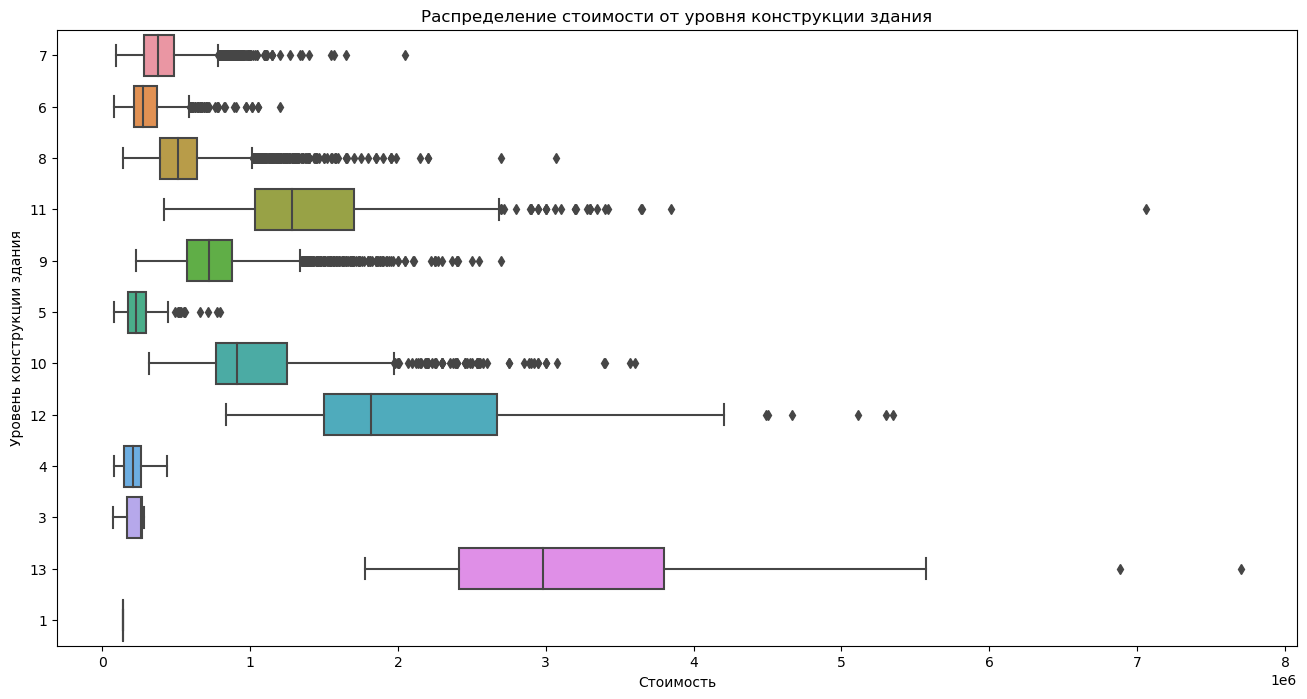

In [77]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5)

plt.title('Распределение стоимости от уровня качества конструкции здания')
plt.xlabel('Стоимость')
plt.ylabel('Уровень качества конструкции здания')

Чем выше качество конструкции здания, тем выше стоимость дома

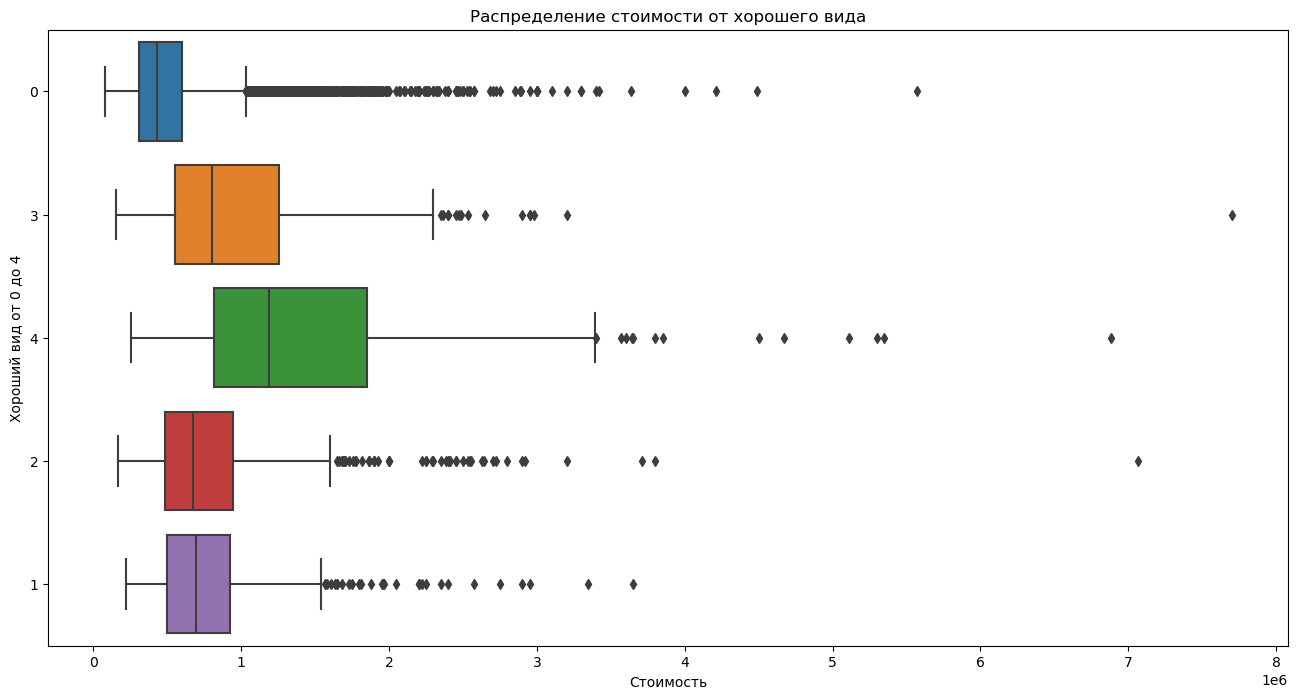

In [83]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5)

plt.title('Распределение стоимости от хорошего вида')
plt.xlabel('Стоимость')
plt.ylabel('Хороший вид от 0 до 4');

In [ ]:
чем лучше вид, тем выше стоимость дома

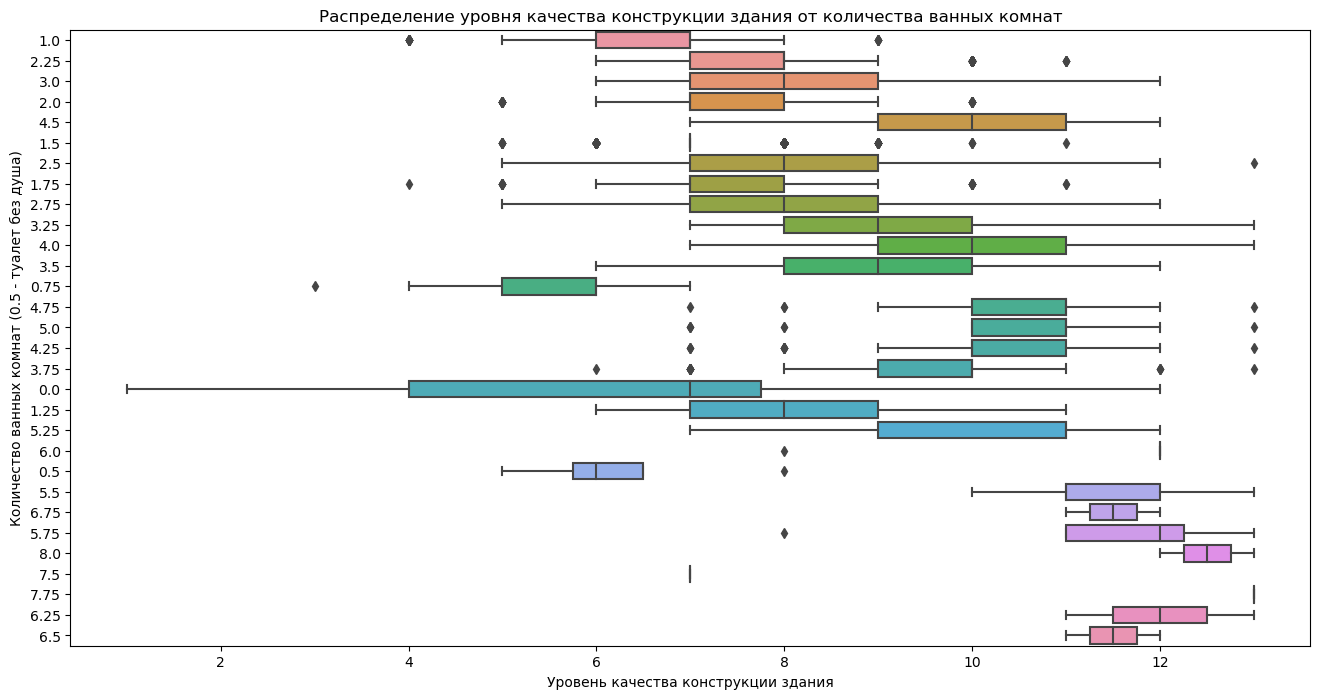

In [85]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['grade'], y=df['bathrooms'].astype('str'), whis=1.5)

plt.title('Распределение уровня качества конструкции здания от количества ванных комнат')
plt.xlabel('Уровень качества конструкции здания')
plt.ylabel('Количество ванных комнат (0.5 - туалет без душа)');

Уровень качества конструкции здания зависит от количества ванных комнат